In this notebook, the web session table will be analized. Accordingly, a split-aggregate strategy of raw datas is adopted to extrat feature out of the original feature in this table.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from __future__ import division


In [3]:
#make the pandas look easier to read
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
df_ses=pd.read_csv('sessions.csv')
df_ses.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


Note that for each user_id, there are multiple entries in the table above. This is consistant to the fact that a users is related to many different web sessions. However, this causes the problem that that machine learning algorithms can not use the data in this table directly. This is because there is not a obvious way we can merge this table with the users table in which there is only one uniqe entry for each user. Next, I will figure out how to solve this issue. 

There are five features in this table: 'user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'. In this notebook, the first three features are investigated. Namely, 'action', 'action_type', 'action_detail' are analized.

Next let's see these features one by one.

### action_type

In [5]:
print 'There are %d different values that action_type can take.' %len(df_ses.action_type.value_counts(dropna = False))

There are 11 different values that action_type can take.


Let's see the occurance for each value of action_type.

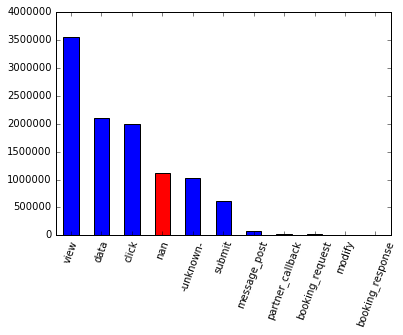

In [6]:
df_ses.action_type.value_counts(dropna = False).plot(kind='bar',color = 'bbbrbbbbbbbbb',rot=70)

There are 11 different values that 'action_type' can take. The occurances of these different action types may be counted (aggregated) and used as an individual feature. Therefore, by doing this feature split, 11 new features come out of the original feature 'action_type'. Since there are no details about the time these activities happen, no temporal structure can be revealed furthermore. 


Similarly, if we ignore the values with very few occurance.  if we ignore the values with very few occurance,  '_action_'and- '_action_detail_' can also be addressed the same way as there are very limited amount of values for them. 

### action

In [7]:
print 'There are %d different values that action can take.' %len(df_ses.action.value_counts(dropna = False))

There are 360 different values that action can take.


The number of different values that action can take is too big to do the split, which will render too many new features. Let's try to see if the most several occued values dominate. Specifically, let's see the percentage of the first 20 most frequently occured actions.

Let's first take a look at the first most occured actions:

In [8]:
action_value_counts = df_ses.action.value_counts(dropna = False)
print 'We have %d total values in the tables'%len(df_ses)
action_value_counts[:20]

We have 10567737 total values in the tables


show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
active                    188036
similar_listings_v2       168788
lookup                    162041
create                    155887
dashboard                 152952
header_userpic            141830
collections               124417
edit                      109083
campaigns                 105028
track_page_view            81117
Name: action, dtype: int64

The difference among the occurances of different actions are in an order of magnitude. This is a good sign that .

In [9]:
df_ses.action.value_counts(dropna = False)[0:20].sum()/len(df_ses)

0.8371094019466987

It can be seen that 83.7% of the actions of all users can be capatured by the the most frequently occurring 20 values for actions. This may suggest that it is a good idea to use the most frequently occurring 20 values for actions, i.e., 'show', 'index',..., track_page_view as new features. By doing this, we do not create too many features, which incur potential computation and overfitting problems. 

Moreover, similar stragegy also applies to the original feature 'action_detail'. Specifically, only the mmost frequently occurring 20 values for action_detail are used to capture 88.4% of  the actions of all users. This is shown next.

### action_detail

In [10]:
print 'There are %d different values that action_detail can take.' %len(df_ses.action_detail.value_counts(dropna = False))

There are 156 different values that action_detail can take.


In [11]:
action_detail_value_counts = df_ses.action_detail.value_counts(dropna = False)
action_detail_value_counts[:20]

view_search_results            1776885
p3                             1376550
NaN                            1126204
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
dashboard                       152952
user_wishlists                  152672
header_userpic                  141830
message_thread                  132395
edit_profile                    108686
message_post                     87103
contact_host                     81041
unavailable_dates                77795
confirm_email_link               58422
Name: action_detail, dtype: int64

The difference between occurances for differnt values of action_detail is also in order of magnitudes.

In [12]:
df_ses.action_detail.value_counts(dropna = False)[0:19].sum()/len(df_ses)

0.8835272868732444

88.4% of the actions of all users can be capatured by the the most frequently occurring 20 values for action_detail. 

#### Summary: 
This note book is concluded that around 50 new features can be extracted from the orginal three raw features, namely 'action_type', 'action', 'action_detail'. The new features are suitable as the inputs to machine lerning algorithm. They captures the most information in the original raw data in the web session table. The details about the feature extration for this table is in the note book 'Feature_engineering__Session_feature_Extraction'.

### Feature extraction

New features are extracted from session dataFrame by using feature splitting combined aggregation. As introduced above, a possible value of one of the original feature (action_type/action/action_detail) is used as a new feature and the occurances are counted as the value of the new feature. For instance, 'view' is a value of 'action_type', for each user, the number of 'view's is counted and used as the value of the new feature 'view'. 

It is noted that as for 'action' and 'action_detail', only the most frequently occurring 20 values are used as the new features.

Checking missing value: 

In [14]:
df_ses.count()

user_id          10533241
action           10488111
action_type       9441533
action_detail     9441533
device_type      10567737
secs_elapsed     10431706
dtype: int64

In [15]:
#Remove rows with missing IDs
df_ses.user_id.replace(np.nan, 'Missing_ID',inplace = True)
d_removed = df_ses[df_ses.user_id != 'Missing_ID'].copy()

#Fill missing values for each column with a different name.
d_removed.action_type.replace(np.nan, 'Missing_actt',inplace = True)
d_removed.action.replace(np.nan, 'Missing_act',inplace = True)
d_removed.action_detail.replace(np.nan, 'Missing_actd',inplace = True)

#### Feature extraction from action_type

For each unique user_id, the number of occurances is counted for  each value of action_type, e.g., the number of occurance of 'click' for user 'd1mm9tcy42' is counted, and the result is used as the value of the new feature 'click'.

In [16]:
g = d_removed.groupby(['user_id','action_type']).size()
df_action_t = g.unstack('action_type').fillna(0) #
df_action_t.head()

action_type,-unknown-,Missing_actt,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
user_id,,,,,,,,,,,
00023iyk9l,0,3,1,0,4,9,1,0,1,0,21
0010k6l0om,5,15,0,0,16,9,0,0,1,0,17
001wyh0pz8,6,5,0,0,66,2,0,0,0,3,8
0028jgx1x1,1,0,0,0,9,5,0,0,0,1,15
002qnbzfs5,184,77,1,0,140,140,16,0,0,15,216


#### Feature extraction from action

In [17]:
#focus only on rows with most 20 frequent valus of 'action'
counted_list = d_removed.action.value_counts().index[:20]
d = d_removed[d_removed.action.isin(counted_list)]
#groupby and unstack
g = d.groupby(['user_id','action']).size()
df_action = g.unstack('action').fillna(0) #
df_action.head()

action,active,ajax_refresh_subtotal,campaigns,collections,create,dashboard,edit,header_userpic,index,lookup,personalize,reviews,search,search_results,show,similar_listings,similar_listings_v2,social_connections,track_page_view,update
user_id,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0,2,0,0,0,4,0,2,4,0,4,0,0,1,9,3,0,0,0,0
0010k6l0om,0,8,0,0,0,2,0,1,5,0,8,0,0,8,20,0,8,0,0,0
001wyh0pz8,4,0,3,4,1,0,0,0,2,0,0,0,66,0,6,0,0,2,0,1
0028jgx1x1,1,0,0,0,1,0,0,0,0,0,0,5,9,0,15,0,0,0,0,0
002qnbzfs5,29,0,28,0,21,2,0,2,115,0,0,13,125,0,232,0,0,72,0,13


#### Feature extraction from action_detail

In [18]:
#Focusing on rows with most 20 frequent valus of 'action'
counted_list = d_removed.action_detail.value_counts().index[:20]
d = d_removed[d_removed.action_detail.isin(counted_list)]
#groupby and unstack
g = d.groupby(['user_id','action_detail']).size()
df_action_d = g.unstack('action_detail').fillna(0) #
df_action_d.head()

action_detail,-unknown-,Missing_actd,change_trip_characteristics,confirm_email_link,contact_host,dashboard,edit_profile,header_userpic,listing_reviews,message_post,message_thread,p3,similar_listings,unavailable_dates,update_listing,user_profile,user_social_connections,user_wishlists,view_search_results,wishlist_content_update
user_id,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0,3,2,1,0,4,0,2,0,1,0,6,3,0,0,0,0,0,5,4
0010k6l0om,5,15,8,0,0,2,0,1,0,0,0,13,0,0,0,0,0,0,10,8
001wyh0pz8,6,5,0,0,0,0,0,0,0,0,0,2,0,0,0,2,2,4,66,0
0028jgx1x1,1,0,0,0,0,0,0,0,5,0,0,9,0,0,0,6,0,0,9,0
002qnbzfs5,184,77,0,1,8,2,0,2,10,16,0,25,0,21,0,109,72,0,125,0


In [19]:
#save the results to be used for merging
df_action_t.to_csv('df_action_t.csv')
df_action.to_csv('df_action.csv')
df_action_d.to_csv('df_action_d.csv')